# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailes.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


In [ ]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


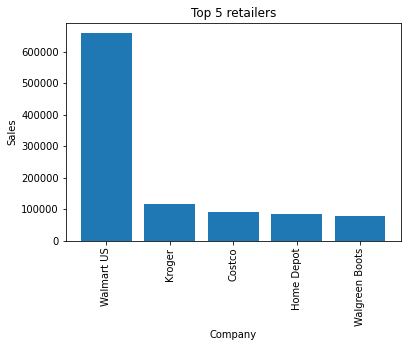

In [ ]:
x = df_sorted['Company'][0:5] #Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
df.max()

Company               Walmart US
Sales                     658119
Stores                   14250.0
Sales/Avg. Store       187.79562
Store Count Growth      0.255662
dtype: object

<AxesSubplot:xlabel='Sales', ylabel='Company'>

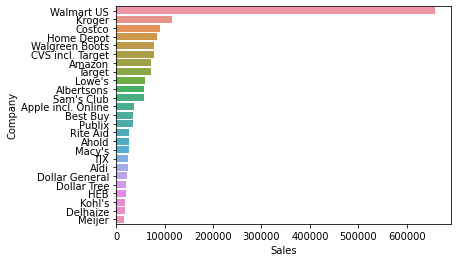

In [ ]:
sns.barplot(x = 'Sales', y = 'Company', data = df)

La compañia dominante en ventas es Walmart US por tal motivo se debe excluir para la resolución del promedio de ventas sin contar la compañia dominante

In [ ]:
df_sin_walmart = df.drop(df.index[0])
df_sin_walmart

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


Al eliminar la fila [0], que incluye la compañia Walmart,podemos obtener el conjunto necesario para poder responder a la pregunta solicitada, ya que descartamos la compañia de mayor ventas

In [ ]:
df_sin_walmart['Sales'].mean()

46602.416666666664

El promedio en ventas excluyendo la empresa más dominante es de 46602.4166 USD.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

<AxesSubplot:xlabel='Sales', ylabel='Company'>

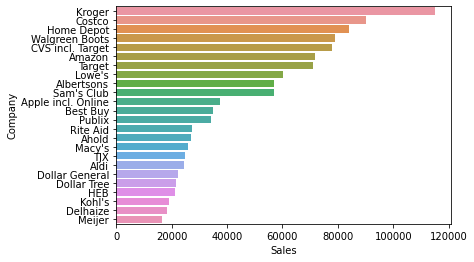

In [ ]:
sns.barplot(x = 'Sales', y = 'Company', data = df_sin_walmart)

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>0) & (df_sin_walmart['Sales'] < 20000)].count()

Company               3
Sales                 3
Stores                3
Sales/Avg. Store      3
Store Count Growth    3
Category              3
dtype: int64

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>20000) & (df_sin_walmart['Sales'] < 40000)].count()

Company               11
Sales                 11
Stores                10
Sales/Avg. Store      10
Store Count Growth    10
Category              10
dtype: int64

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>40000) & (df_sin_walmart['Sales'] < 60000)].count()

Company               2
Sales                 2
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              2
dtype: int64

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>60000) & (df_sin_walmart['Sales'] < 80000)].count()

Company               5
Sales                 5
Stores                4
Sales/Avg. Store      4
Store Count Growth    4
Category              5
dtype: int64

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>80000) & (df_sin_walmart['Sales'] < 100000)].count()

Company               2
Sales                 2
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              2
dtype: int64

In [ ]:
df_sin_walmart[(df_sin_walmart['Sales']>100000) & (df_sin_walmart['Sales'] < 120000)].count()

Company               1
Sales                 1
Stores                1
Sales/Avg. Store      1
Store Count Growth    1
Category              1
dtype: int64

Como se puede observar en la grafica además de la segmentación por bloques la mayoria de las compañias genero ventas entre 20000 y 40000 USD.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

<AxesSubplot:xlabel='Stores', ylabel='Company'>

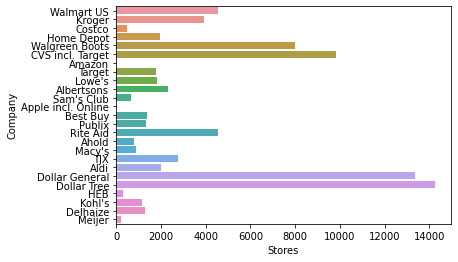

In [ ]:
sns.barplot(x = 'Stores', y = 'Company', data = df)

In [ ]:
df[(df['Stores']>0) & (df['Stores'] < 2000)].count()

Company               13
Sales                 13
Stores                13
Sales/Avg. Store      13
Store Count Growth    13
Category              13
dtype: int64

In [ ]:
df[(df['Stores']>2000) & (df['Stores'] < 4000)].count()

Company               4
Sales                 4
Stores                4
Sales/Avg. Store      4
Store Count Growth    4
Category              4
dtype: int64

In [ ]:
df[(df['Stores']>4000) & (df['Stores'] < 6000)].count()

Company               2
Sales                 2
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              2
dtype: int64

In [ ]:
df[(df['Stores']>6000) & (df['Stores'] < 8000)].count()

Company               0
Sales                 0
Stores                0
Sales/Avg. Store      0
Store Count Growth    0
Category              0
dtype: int64

In [ ]:
df[(df['Stores']>8000) & (df['Stores'] < 10000)].count()

Company               2
Sales                 2
Stores                2
Sales/Avg. Store      2
Store Count Growth    2
Category              2
dtype: int64

In [ ]:
df[(df['Stores']>10000) & (df['Stores'] < 12000)].count()

Company               0
Sales                 0
Stores                0
Sales/Avg. Store      0
Store Count Growth    0
Category              0
dtype: int64

In [ ]:
df[(df['Stores']>12000) & (df['Stores'] < 14000)].count()

Company               1
Sales                 1
Stores                1
Sales/Avg. Store      1
Store Count Growth    1
Category              1
dtype: int64

La mayor cantidad de tiendas que tiene la mayoria de las compañias evaluadas en este dataset esta entre 0 y 2000 tiendas

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

In [ ]:
df.corr()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Sales,1.000000,0.063301,0.220847,-0.078315
Stores,0.063301,1.000000,-0.446166,0.465135
Sales/Avg. Store,0.220847,-0.446166,1.000000,-0.057068
Store Count Growth,-0.078315,0.465135,-0.057068,1.000000


In [ ]:
df['Sales'].corr(df['Stores'])

0.06330142261164261

In [ ]:
df['Sales']

0     658119
1     115037
2      90048
3      83976
4      78924
5      77792
6      71687
7      71208
8      60311
9      56829
10     56828
11     37664
12     34980
13     34408
14     27486
15     26903
16     26028
17     25012
18     24402
19     22234
20     21464
21     21384
22     19060
23     18201
24     16592
Name: Sales, dtype: int64

In [ ]:
df['Stores']

0      4574.0
1      3931.0
2       495.0
3      1965.0
4      8002.0
5      9813.0
6         NaN
7      1772.0
8      1828.0
9      2326.0
10      655.0
11        NaN
12     1389.0
13     1351.0
14     4553.0
15      794.0
16      889.0
17     2770.0
18     2021.0
19    13350.0
20    14250.0
21      323.0
22     1169.0
23     1280.0
24      231.0
Name: Stores, dtype: float64

Observando los datos se puede determinar que la empresa de mayores ventas no coincide con la que posee mayores tiendas, además para generar un apoyo se realizo el calculo de correlación de ambas columnas las cuales estan lejanas de 1 por lo que se puede determinar que no hay una gran correlación entre las mismas.

### 5. ¿Cuál es el rango que existe entre las ventas?

<AxesSubplot:xlabel='Sales', ylabel='Company'>

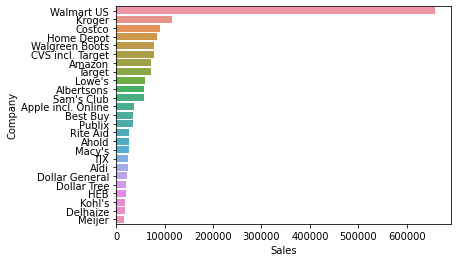

In [ ]:
sns.barplot(x = 'Sales', y = 'Company', data = df)

In [ ]:
df['Sales'].min()

16592

In [ ]:
df['Sales'].max()

658119

Si tomamos en cuenta Walmart aumenta el rango desde 16592 a 658119

In [ ]:
df_sin_walmart['Sales'].min()

16592

In [ ]:
df_sin_walmart['Sales'].max()

115037

Si omitimos a la empresa walmart podemos tener un rango desde 16592 hasta 115037

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
df_ordenado_sales = df.sort_values(['Sales'])
df_ordenado_sales.tail()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


In [ ]:
df_ordenado_stores = df.replace(np.nan,0)
df_ordenado_stores = df_ordenado_stores.sort_values(['Stores'])
df_ordenado_stores.tail()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores


Walmart es la empresa que se encuentra como la que mas ventas tienes y ocupa el quinto puesto de la empresa que mas tiendas tiene. Tambien cabe destacar que la empresa Walgreen Boots se encuentra en el quinto puesto de mas ventas y el cuarto puesto de mayor cantidad de tiendas.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
df.groupby('Category')[['Sales']].count()

,Sales
Category,
Apparel,1
Department Stores,2
Dollar Stores,2
Drug Stores,3
Electronic/Mail Order,1
Electronics,1
Grocery,7
Home Improvement,2
Supercenters,3


In [ ]:
df.groupby('Category')['Sales'].sum()

Category
Apparel                   25012
Department Stores         45088
Dollar Stores             43698
Drug Stores              184202
Electronic/Mail Order     71687
Electronics               34980
Grocery                  297164
Home Improvement         144287
Supercenters             745919
Warehouse Club            90048
Warehouse Clubs           56828
Name: Sales, dtype: int64

La categoria que más ventas genero es la categoria Supercenters

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df.sort_values(['Stores','Sales'],ascending=False)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery


La tiendas Dollar Tree es la que posee una mayor relación de tiendas por ventas

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

Para este caso se asumira que los datos Nan de la columna Store representan las tiendas online y de este modo poder llegar a una conclusión con el conjunto de datos dado que no se hace de forma explicita en el mismo

In [ ]:
nan_rows = df[df.isnull().any(1)]
nan_rows

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


In [ ]:
df['Category'] == 'Electronic/Mail Order'

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Category, dtype: bool

Podemos verificar que en la busqueda de la columna Stores que posee dato nan se encontraron Amazon y Apple incl. Online, la cual una de las dos encontradas hace referencia explicita el nombre online en el nombre de la compañia y el otro por la referencia en la categoria de Electronic/Mail Order la cuales nos hace referencia a que las ventas se hacen de manera online y por tal motivo destacan sobre las que tienen tiendas físicas.

## III. Tus propias preguntas

### 10. Cual es la categoria que posee mayor cantidad de compañia

In [ ]:
df.groupby('Category').count()

Category
Apparel                  1
Department Stores        2
Dollar Stores            2
Drug Stores              3
Electronic/Mail Order    1
Electronics              1
Grocery                  7
Home Improvement         2
Supercenters             3
Warehouse Club           1
Warehouse Clubs          1
Name: Sales, dtype: int64

Grocery es la categoriaque posee la mayor cantidad de compañias de nuestro conjunto de datos

### 11. Cual es la distribución de Tiendas por categoria

<AxesSubplot:xlabel='Stores', ylabel='Category'>

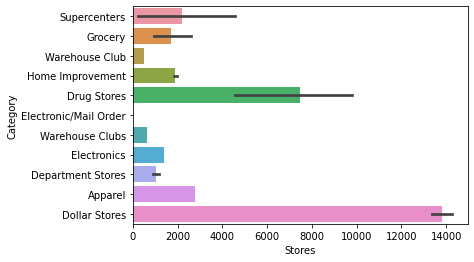

In [ ]:
sns.barplot(x = 'Stores', y = 'Category', data = df)

Podemos observar como esta la distribución de tiendas por categoria en donde predomina Dollar Stores

### 12. Mostrar la distribución de Ventas por categoria

<AxesSubplot:xlabel='Sales', ylabel='Category'>

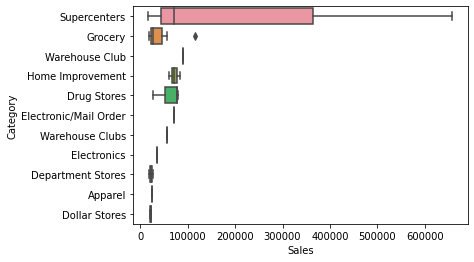

In [ ]:
sns.boxplot(x = 'Sales', y = 'Category', data = df)

Podemos obeservar la distribución por categorias en donde se nota que es predominante la categoria Supercenters

In [ ]:
!ls /datasets/drivecontactgiocrisrai

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de5ab67e-5d9a-431c-a96d-fddb491f731d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>